In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Acquire Data

In [116]:
train = pd.read_csv('train.csv')

In [36]:
train_labels = pd.read_csv('train_labels.csv')

In [4]:
specs = pd.read_csv('specs.csv')

In [55]:
print(f'Size of train data is {train.shape}.')
print(f'Size of train_labels data is {train_labels.shape}.')
print(f'Size of specs data is {specs.shape}.')

Size of train data is (11341042, 11).
Size of train_labels data is (17690, 7).
Size of specs data is (386, 3).


# Summarize Train Data

In [17]:
print(f'The train df has {train.shape[0]} rows and {train.shape[1]} columns.')

The train df has 11341042 rows and 11 columns.


In [5]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [6]:
train.describe()

,event_count,event_code,game_time
count,1.134104e+07,1.134104e+07,1.134104e+07
mean,1.056642e+02,3.513838e+03,1.976236e+05
std,1.483477e+02,6.816470e+02,1.803968e+06
min,1.000000e+00,2.000000e+03,0.000000e+00
25%,2.500000e+01,3.021000e+03,3.061800e+04
50%,6.100000e+01,4.020000e+03,7.276100e+04
75%,1.290000e+02,4.035000e+03,1.574460e+05
max,3.368000e+03,5.010000e+03,3.069102e+08


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [11]:
train.shape

(11341042, 11)

In [24]:
print(f"The train df has {train['installation_id'].nunique()} unique installation_id values and no nulls.")

The train df has 17000 unique installation_id values and no nulls.


In [23]:
train.isnull().sum()

event_id           0
game_session       0
timestamp          0
event_data         0
installation_id    0
event_count        0
event_code         0
game_time          0
title              0
type               0
world              0
dtype: int64

In [56]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

event_id                384
game_session         303319
timestamp          10777308
event_data         10893749
installation_id       17000
title                    44
type                      4
world                     4
dtype: int64

# Summarize Train_labels

In [37]:
print(f'The train_labels df has {train_labels.shape[0]} rows and {train_labels.shape[1]} columns.')

The train_labels df has 17690 rows and 7 columns.


In [38]:
print(f"The train_label df has {train_labels['installation_id'].nunique()} unique installation_id values and no nulls.")

The train_label df has 3614 unique installation_id values and no nulls.


In [39]:
train_labels.isnull().sum()

game_session       0
installation_id    0
title              0
num_correct        0
num_incorrect      0
accuracy           0
accuracy_group     0
dtype: int64

In [40]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [41]:
train_labels.describe()

,num_correct,num_incorrect,accuracy,accuracy_group
count,17690.000000,17690.000000,17690.000000,17690.000000
mean,0.760938,1.587790,0.595810,1.885585
std,0.426523,3.058295,0.430559,1.256796
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.111111,1.000000
50%,1.000000,0.500000,0.750000,2.500000
75%,1.000000,2.000000,1.000000,3.000000
max,1.000000,85.000000,1.000000,3.000000


In [42]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


In [57]:
train_labels.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

game_session       17690
installation_id     3614
title                  5
dtype: int64

In [43]:
train_labels.groupby('accuracy_group')['installation_id'].count()

accuracy_group
0    4229
1    2411
2    2205
3    8845
Name: installation_id, dtype: int64

## 50% of users pass the assessments on the first try

In [48]:
values['count'] = pd.DataFrame(train_labels.accuracy_group.value_counts())

In [49]:
values['percent'] = train_labels.accuracy_group.value_counts(normalize=True)

In [51]:
values.drop(columns='accuracy_group')

,percent,count
3,0.500000,8845
0,0.239062,4229
1,0.136292,2411
2,0.124647,2205


# Summarize spec data

In [53]:
print(f'The specs df has {specs.shape[0]} rows and {specs.shape[1]} columns.')

The specs df has 386 rows and 3 columns.


In [52]:
specs.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [58]:
specs.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

event_id    386
info        168
args        191
dtype: int64

# Explore Train df

In [117]:
corrs = train.corr()
corrs

,event_count,event_code,game_time
event_count,1.000000,0.043830,0.142553
event_code,0.043830,1.000000,0.005257
game_time,0.142553,0.005257,1.000000


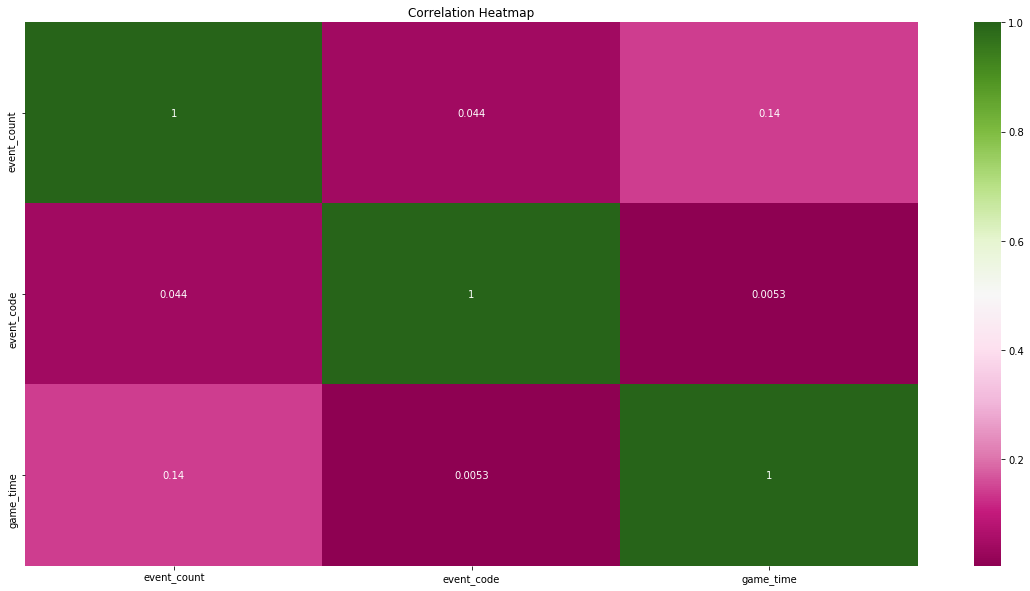

In [118]:
plt.figure(figsize = (20, 10))

sns.heatmap(corrs, cmap = 'PiYG', annot = True)
plt.title('Correlation Heatmap');

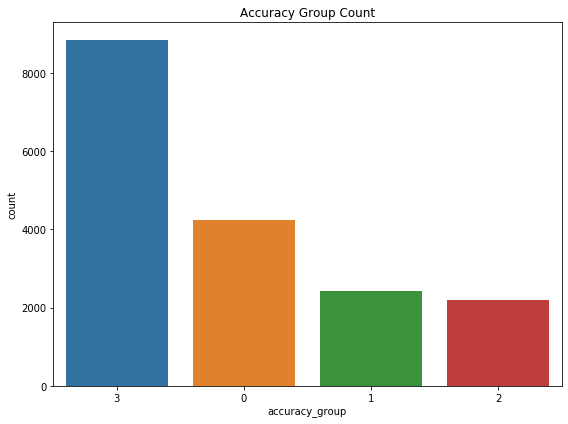

In [119]:
plt.figure(figsize=(8, 6))

sns.countplot(x="accuracy_group",data=train_labels, order = train_labels['accuracy_group'].value_counts().index)

plt.title('Accuracy Group Count')
plt.tight_layout()
plt.show()

In [120]:
train.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE


In [121]:
train_labels.head(1)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3


In [ ]:
merge = train.merge(right=train_labels, how='outer', on='installation_id')
merge.isnull().sum()

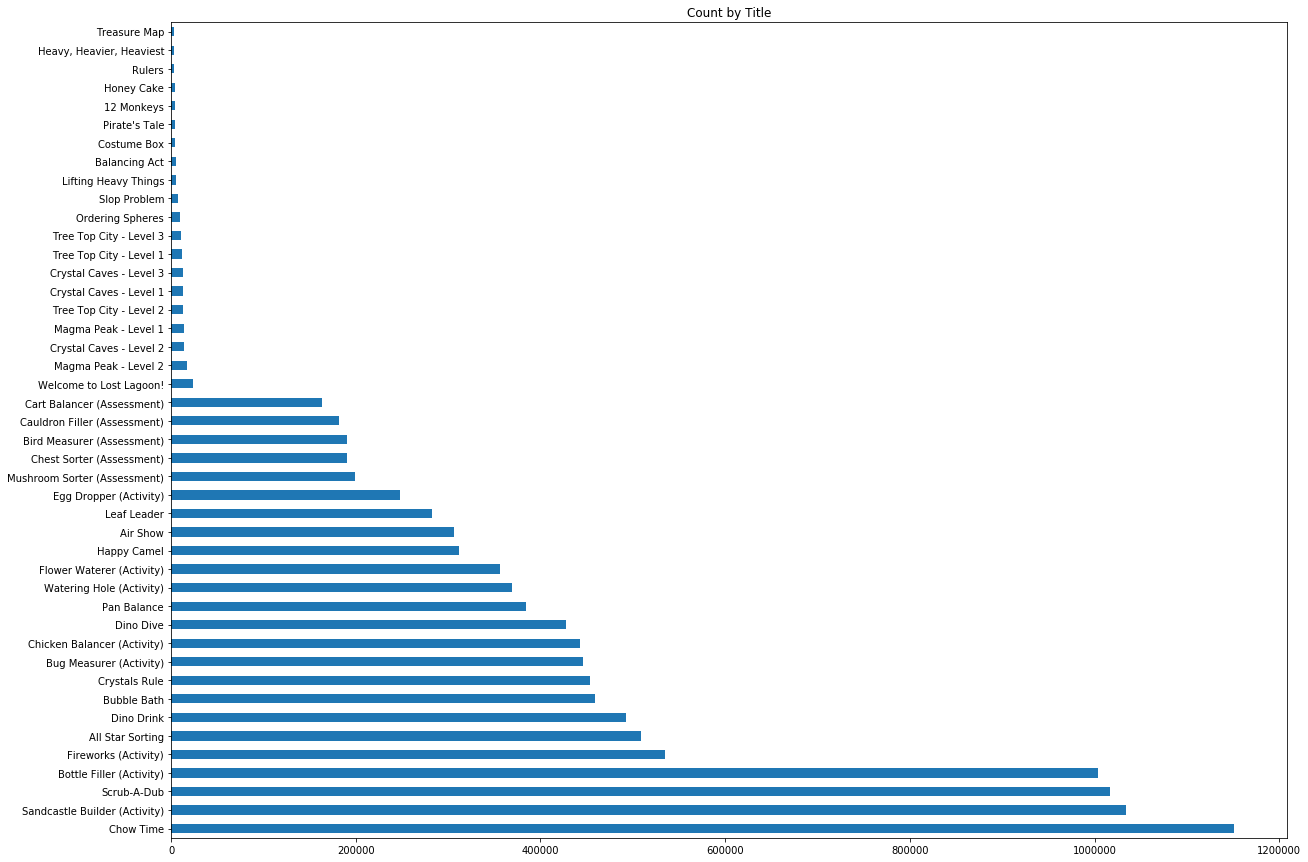

In [122]:
train['title'].value_counts().plot(kind='barh', figsize=(20, 15), title='Count by Title')

plt.show()

In [123]:
train.world.value_counts()

MAGMAPEAK       5023687
CRYSTALCAVES    3232546
TREETOPCITY     3061231
NONE              23578
Name: world, dtype: int64

- Convert timestamp to datetime object and extract hour time parts for exploration

In [124]:
# Format and make date / hour features
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['date'] = train['timestamp'].dt.date
train['hour'] = train['timestamp'].dt.hour
train['weekday_name'] = train['timestamp'].dt.weekday_name
# Same for test
# test['timestamp'] = pd.to_datetime(test['timestamp'])
# test['date'] = test['timestamp'].dt.date
# test['hour'] = test['timestamp'].dt.hour
# test['weekday_name'] = test['timestamp'].dt.weekday_name

In [125]:
train.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,hour,weekday_name
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,17,Friday


In [128]:
train.weekday_name.value_counts()

Friday       1801243
Thursday     1689996
Monday       1617978
Saturday     1590883
Tuesday      1566807
Sunday       1540013
Wednesday    1534122
Name: weekday_name, dtype: int64

In [141]:
# Create an array with the colors you want to use
#colors = ["#FF0B04", "#4374B3"]

# Set your custom color palette
my_pal = sns.color_palette('husl')

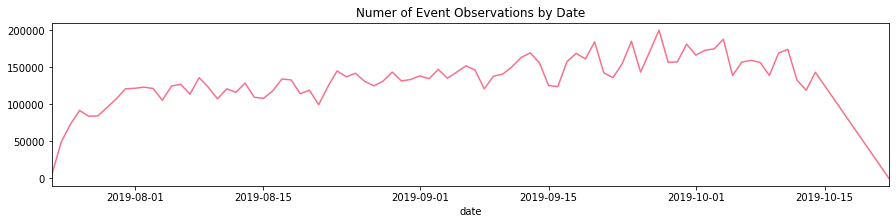

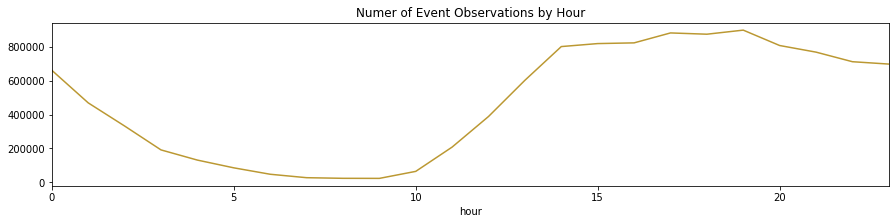

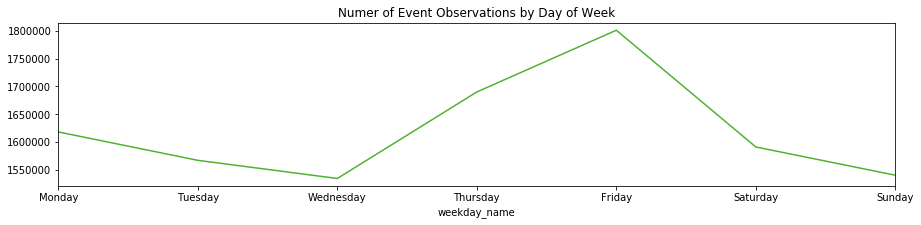

In [146]:
train.groupby('date')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Date',
         color=my_pal[0])
plt.show()
train.groupby('hour')['event_id'] \
    .agg('count') \
    .plot(figsize=(15, 3),
         title='Numer of Event Observations by Hour',
         color=my_pal[1])
plt.show()
train.groupby('weekday_name')['event_id'] \
    .agg('count').T[['Monday','Tuesday','Wednesday',
                     'Thursday','Friday','Saturday',
                     'Sunday']].T.plot(figsize=(15, 3),
                                       title='Numer of Event Observations by Day of Week',
                                       color=my_pal[2])
plt.show()

# Explore train_labels df

In [69]:
corrs = train_labels.corr()
corrs

,num_correct,num_incorrect,accuracy,accuracy_group
num_correct,1.000000,-0.417492,0.775654,0.840957
num_incorrect,-0.417492,1.000000,-0.593068,-0.573865
accuracy,0.775654,-0.593068,1.000000,0.988150
accuracy_group,0.840957,-0.573865,0.988150,1.000000


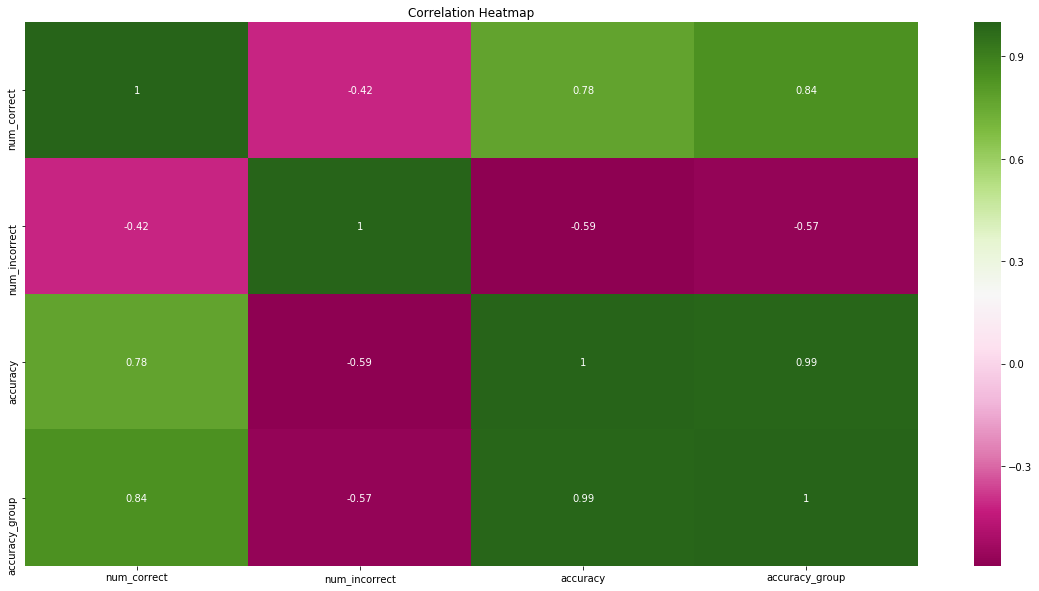

In [70]:
plt.figure(figsize = (20, 10))

sns.heatmap(corrs, cmap = 'PiYG', annot = True)
plt.title('Correlation Heatmap');

In [86]:
train_labels[train_labels['accuracy_group'] == 3]['title'].value_counts()

Cart Balancer (Assessment)      2752
Cauldron Filler (Assessment)    2545
Mushroom Sorter (Assessment)    2348
Bird Measurer (Assessment)       693
Chest Sorter (Assessment)        507
Name: title, dtype: int64

In [87]:
train_labels[train_labels['accuracy_group'] == 2]['title'].value_counts()

Cauldron Filler (Assessment)    630
Cart Balancer (Assessment)      470
Mushroom Sorter (Assessment)    460
Bird Measurer (Assessment)      389
Chest Sorter (Assessment)       256
Name: title, dtype: int64

In [88]:
train_labels[train_labels['accuracy_group'] == 1]['title'].value_counts()

Bird Measurer (Assessment)      778
Chest Sorter (Assessment)       466
Cauldron Filler (Assessment)    459
Mushroom Sorter (Assessment)    355
Cart Balancer (Assessment)      353
Name: title, dtype: int64

In [89]:
train_labels[train_labels['accuracy_group'] == 0]['title'].value_counts()

Chest Sorter (Assessment)       1752
Bird Measurer (Assessment)       886
Mushroom Sorter (Assessment)     594
Cart Balancer (Assessment)       576
Cauldron Filler (Assessment)     421
Name: title, dtype: int64

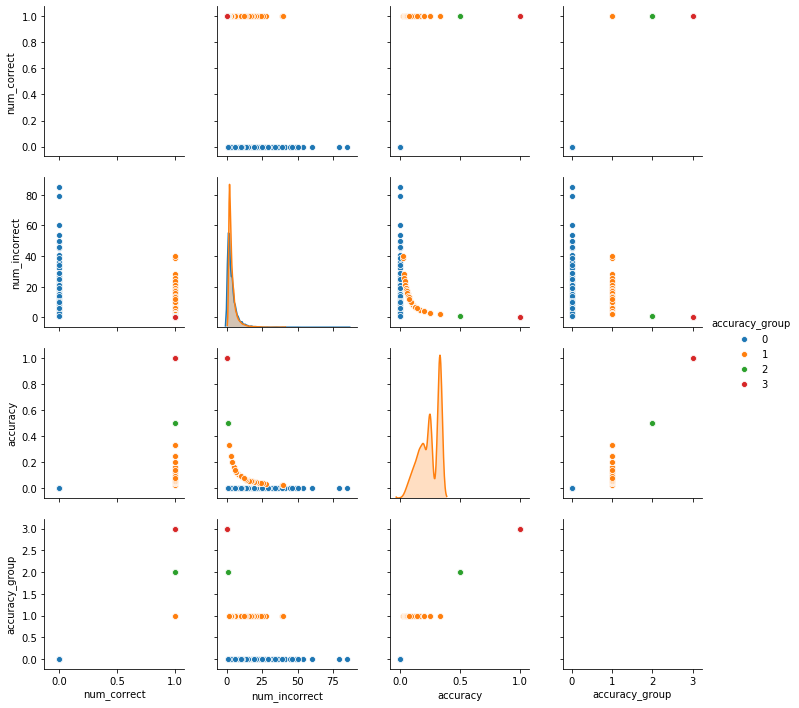

In [91]:
sns.pairplot(train_labels, hue='accuracy_group')
plt.show()